In [3]:
%pylab inline
from scipy.integrate import *

Populating the interactive namespace from numpy and matplotlib


![Rendszer](abra.png "A rendszer ábrája")

In [2]:
figsize(12,8)

In [15]:
#g = 9.81
mu = 0.3
E = -0.3
section = 0

def dSdt(t,S):   #növekményfüggvény
    l, v_l, phi, v_phi = S
    return [v_l, mu*cos(phi) + mu*l*v_phi**2 - (1 - mu), v_phi, 
    (-sin(phi) - (2*v_l*v_phi))/l]
    
def dSdt_2(S,t):   #növekményfüggvény
    l, l_potty, fi, fi_potty = S
    return [l_potty, (mu*cos(fi)) + (mu*l*fi_potty**2) - (1 - mu), fi_potty, 
    (-sin(fi) - (2*l_potty*fi_potty))/l]

#def energy(t,S):
#    l, l_potty, fi, fi_potty = S
#    return l_potty**2/2 + mu*l**2*fi_potty**2/2 - mu*l*cos(fi) - (1 - mu)*(1 - l) - E

def poincare(t,S):
    l, v_l, phi, v_phi = S
    return phi - section

[15.49193338  7.30296743  5.05615845  2.91359618  2.30940108  2.1437388
  1.6         1.08866211]


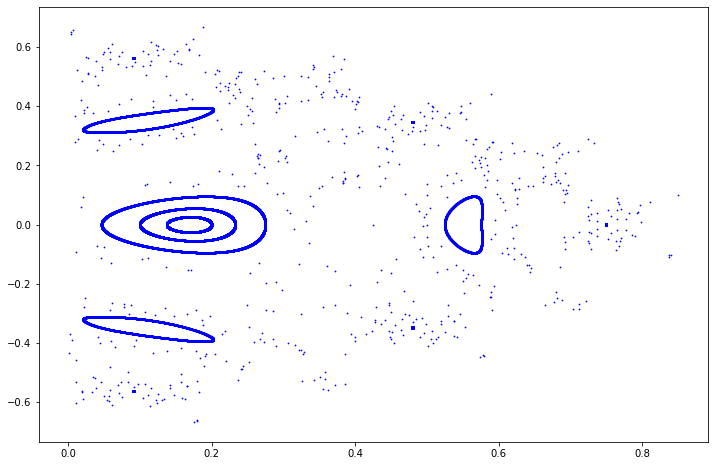

In [6]:
#energy.direction = 1
poincare.direction = 1
tspan = (0, 1e5)
t = linspace(0,1e5,int(1e7))
l0 = array([0.1, 0.2, 0.275, 0.425, 0.5, 0.525, 0.625, 0.75])
v_l0 = zeros(len(l0))
phi0 = section*ones(len(l0))
v_phi0 = sqrt((2/(mu*l0**2))*(mu*l0*cos(phi0) + (1 - mu)*(1 - l0) - v_l0**2/2 + E))
print(v_phi0)
L = []; VL = []
for i in range(len(l0)):
    sol = solve_ivp(dSdt, tspan, [l0[i],v_l0[i],phi0[i],v_phi0[i]], 'LSODA', t, events=(poincare), dense_output=True, rtol=1e-10, atol=1e-10)
    L.append(array(sol.y_events).T[0]); VL.append(array(sol.y_events).T[1])

#print(sol.sol(sol.y_events))
#print(sol.y_events[0]) #; print(sol.y_events[1])
for i in range(len(L)):
    plot(L[i], VL[i], 'b.', ms=1.5)
    
savefig('poincare.png')

In [9]:
t = linspace(0,1e5,int(1e4))

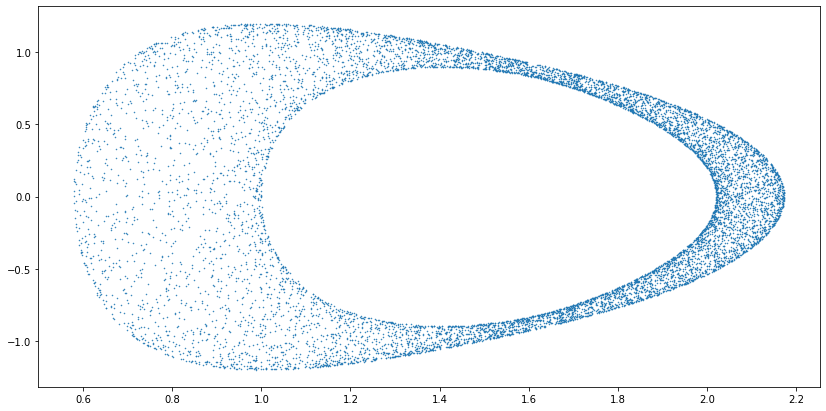

In [16]:
figsize(14,7)
ans = odeint(dSdt_2, [1,0,0,pi], t)
plot(ans[:,0],ans[:,1], 'o', ms=0.5)

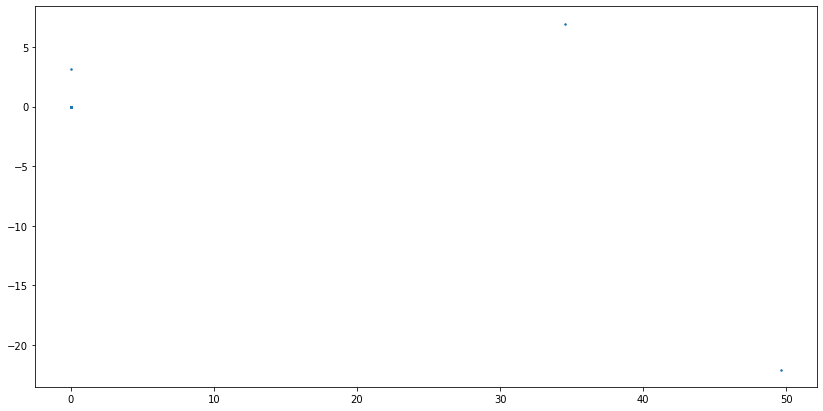

In [14]:
plot(ans[:,2],ans[:,3], 'o', ms=1.5)